# Word Bin Counts Analysis

In [1]:
import os
import json
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
dataset_dir = os.path.join('..','..','datasets','tracks_playlist_dataset')

json_file_path = os.path.join(dataset_dir,'word_count_data.json')

with open(json_file_path, 'r') as f:
    data = json.load(f)

In [3]:
list(data['global'].keys())[:10]

['favorite',
 'calming',
 'study',
 'diaries',
 'soothing',
 'mack',
 'sleep',
 'camille',
 'mellow',
 'sleeep']

## Global Word Count Analysis

In [4]:
# get sorted list of words across all tracks ranked by bin count
global_word_bins = data['global']
global_sorted_words = sorted(global_word_bins.items(), key=lambda x: x[1], reverse=True)

In [5]:
global_sorted_words[:10]

[('rock', 409894),
 ('oldies', 147719),
 ('classic', 147634),
 ('party', 128832),
 ('summer', 126412),
 ('good', 119145),
 ('chill', 113242),
 ('old', 107009),
 ('classics', 79934),
 ('workout', 79276)]

In [6]:
global_sorted_words[-10:]

[('bandona', 1),
 ('kiko', 1),
 ('cumbiaa', 1),
 ('norteña', 1),
 ('conjunto', 1),
 ('grupo', 1),
 ('ajua', 1),
 ('rebelution', 1),
 ('mirrey', 1),
 ('salseando', 1)]

In [7]:
bin_counts = np.array([x[1] for x in global_sorted_words])
bin_counts[:10]

array([409894, 147719, 147634, 128832, 126412, 119145, 113242, 107009,
        79934,  79276])

In [8]:
# How many words total
len(global_sorted_words)

9723

In [9]:
int(np.max(bin_counts))

409894

In [10]:
int(np.max(bin_counts[1:]))

147719

In [11]:
# How many words with only 1 bin count
int(sum(bin_counts == 1))

296

In [12]:
thresholds = [1e2, 1e3, 1e4, 1e5, 1e6]
order_counts = np.zeros(len(thresholds))

for i,t in enumerate(thresholds):
    order_counts[i] = int(sum(bin_counts < t))

print(thresholds)
print(order_counts)

[100.0, 1000.0, 10000.0, 100000.0, 1000000.0]
[5344. 9032. 9640. 9715. 9723.]


In [13]:
for i in range(len(bin_counts)):
    if bin_counts[i]<100:
        print(i)
        break

4379


In [14]:
for i in range(len(bin_counts)):
    if bin_counts[i]<1000:
        print(i)
        break

691


In [15]:
for i in range(len(bin_counts)):
    if bin_counts[i]<10000:
        print(i)
        break

83


In [16]:
# bin_counts_rev = bin_counts[::-1]
# incs = np.zeros(len(bin_counts_rev)-1)
# for i in range(len(bin_counts_rev)-1):
#     val = bin_counts_rev[i]
#     next_val = bin_counts_rev[i+1]
#     incs[i] = next_val - val
#     if len(str(next_val)) == len(str(val)) + 1:
#         print(i)

In [17]:
# ix = 1479
# print(bin_counts_rev[ix-10:ix+1])
# print(incs[ix-10:ix+1])

In [18]:
# ix = 5344
# print(bin_counts_rev[ix-10:ix+1])
# print(incs[ix-10:ix+1])

In [19]:
# thres = 19
# for i in range(10,len(incs)):
#     prev_avg = np.mean(incs[i-10:i])

#     if prev_avg > 0:
#         v = incs[i]
#         diff = v - prev_avg
#         if diff/prev_avg > thres:
#             print(i)
#             print(v)
#             print(incs[i-10:i])
#             # print(prev_avg)
#             # print(diff)
#             print(diff/prev_avg)
#             print(bin_counts_rev[i])
#             print(bin_counts_rev[i-10:i])
#             break

In [20]:
# non_zero_incs = []
# for v in incs:
#     if v > 10:
#         non_zero_incs.append(v)
# non_zero_incs[:10]

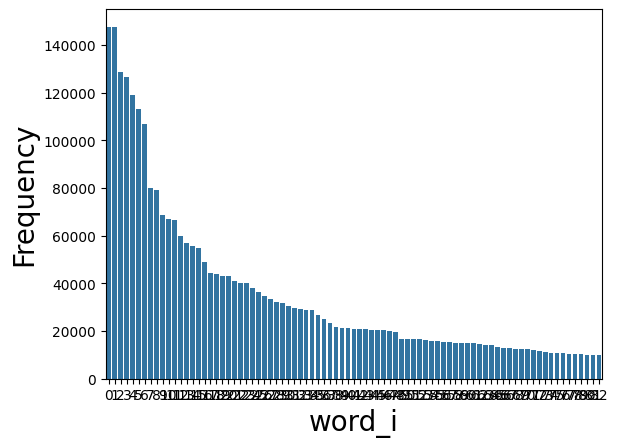

In [21]:
# sns.barplot(data=bin_counts)
# plt.xlabel("word_i",fontsize=20)
# plt.ylabel("Frequency",fontsize=20)
# plt.show()

# sns.barplot(data=bin_counts[:4739])
# plt.xlabel("word_i",fontsize=20)
# plt.ylabel("Frequency",fontsize=20)
# plt.show()

# sns.barplot(data=bin_counts[1:4739])
# plt.xlabel("word_i",fontsize=20)
# plt.ylabel("Frequency",fontsize=20)
# plt.show()

# sns.barplot(data=bin_counts[1:691])
# plt.xlabel("word_i",fontsize=20)
# plt.ylabel("Frequency",fontsize=20)
# plt.show()

sns.barplot(data=bin_counts[1:84])
plt.xlabel("word_i",fontsize=20)
plt.ylabel("Frequency",fontsize=20)
plt.show()

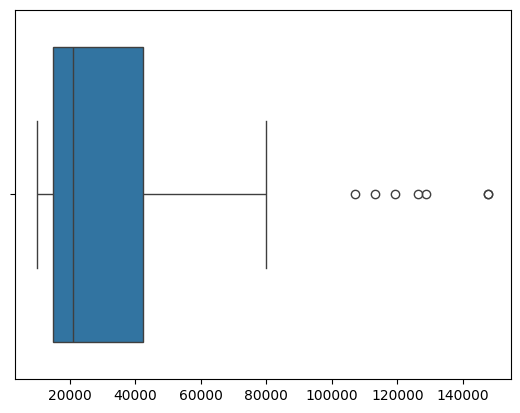

In [22]:
# sns.boxplot(x=bin_counts)
# plt.show()

# sns.boxplot(x=bin_counts[:4739])
# plt.show()

# sns.boxplot(x=bin_counts[1:4739])
# plt.show()

# sns.boxplot(x=bin_counts[1:691])
# plt.show()

sns.boxplot(x=bin_counts[1:83])
plt.show()

In [24]:
q1 = np.percentile(bin_counts[1:83], 25)
q3 = np.percentile(bin_counts[1:83], 75)
iqr = q3 - q1

lower_whisker = np.min(bin_counts[1:83][bin_counts[1:83] >= q1 - 1.5 * iqr])
upper_whisker = np.max(bin_counts[1:83][bin_counts[1:83] <= q3 + 1.5 * iqr])

print("Lower whisker:", lower_whisker)
print("Q1:", q1)
print("Median:", np.median(bin_counts[1:83]))
print("Q3:", q3)
print("Upper whisker:", upper_whisker)


Lower whisker: 10127
Q1: 14874.75
Median: 20952.0
Q3: 42496.0
Upper whisker: 79934


## Bin Count DataFrame